In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Parameters
IMG_SIZE = 128
BATCH_SIZE = 32
NUM_CLASSES = 5
DATA_DIR = 'dataset(5dishes)'  # path to your dataset with train/val/test folders

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'validate'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_gen,
    epochs=25,
    validation_data=val_gen,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")


Found 3577 images belonging to 5 classes.
Found 510 images belonging to 5 classes.
Found 1026 images belonging to 5 classes.
Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.3357 - loss: 1.5522 - val_accuracy: 0.5275 - val_loss: 1.1702
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.5037 - loss: 1.2147 - val_accuracy: 0.5275 - val_loss: 1.1644
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 24s 214ms/step - accuracy: 0.5775 - loss: 1.0854 - val_accuracy: 0.5745 - val_loss: 1.0891
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 219ms/step - accuracy: 0.6263 - loss: 0.9778 - val_accuracy: 0.6373 - val_loss: 0.9985
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.6504 - loss: 0.9548 - val_accuracy: 0.6275 - val_loss: 1.0021
Epoch 6/25
 60/112 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.6630 - loss: 0.9430

KeyboardInterrupt: 

In [ ]:
MODEL_SAVE_PATH = 'cnn_vnfood_5dishes.h5'

# Save the trained model
model.save(MODEL_SAVE_PATH)
print(f"✅ Model saved to {MODEL_SAVE_PATH}")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_gen)
print(f"🎯 Test Accuracy: {test_acc:.4f}")

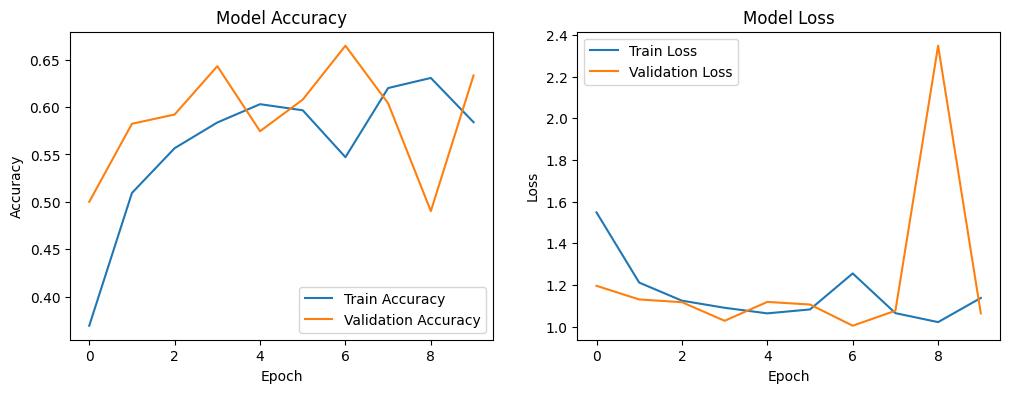

In [5]:
# plot accuracy and loss
import matplotlib.pyplot as plt
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()
plot_history(history)